삼성전자 Ticker Symbol : 005930.KS

In [1]:
# 1. 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\actruce\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
df = pd.read_csv('SAMSUNG.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4429.951660,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4045.685303,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4074.684326,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4016.683594,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4183.439453,46880000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161 entries, 0 to 6160
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6161 non-null   object 
 1   Open       6161 non-null   float64
 2   High       6161 non-null   float64
 3   Low        6161 non-null   float64
 4   Close      6161 non-null   float64
 5   Adj Close  6161 non-null   float64
 6   Volume     6161 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 337.1+ KB


In [6]:
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)

In [7]:
df.shape

(6161, 6)

In [8]:
df.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2024-07-18', '2024-07-19', '2024-07-22', '2024-07-23',
               '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-29',
               '2024-07-30', '2024-07-31'],
              dtype='datetime64[ns]', name='Date', length=6161, freq=None)

In [9]:
df.loc['2024']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,78200.0,79800.0,78200.0,79600.0,78888.046875,17142847
2024-01-03,78500.0,78800.0,77000.0,77000.0,76311.304688,21753644
2024-01-04,76100.0,77300.0,76100.0,76600.0,75914.882812,15324439
2024-01-05,76700.0,77100.0,76400.0,76600.0,75914.882812,11304316
2024-01-08,77000.0,77500.0,76400.0,76500.0,75815.781250,11088724
...,...,...,...,...,...,...
2024-07-25,80400.0,81000.0,80100.0,80400.0,80400.000000,20323811
2024-07-26,80700.0,81300.0,80400.0,80900.0,80900.000000,14508334
2024-07-29,81600.0,82000.0,81100.0,81200.0,81200.000000,12797136


<AxesSubplot:xlabel='Date'>

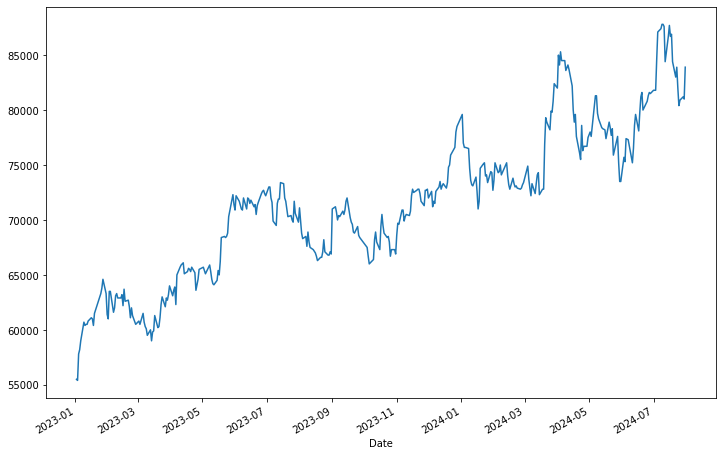

In [10]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
df.loc['2023':'2024', 'Close'].plot(ax=ax1)

In [11]:
df_weekly_mean = df['Close'].resample('W').mean()
df_weekly_mean.head()

Date
2000-01-09    5712.5
2000-01-16    5760.0
2000-01-23    6016.0
2000-01-30    5592.0
2000-02-06    5282.0
Freq: W-SUN, Name: Close, dtype: float64

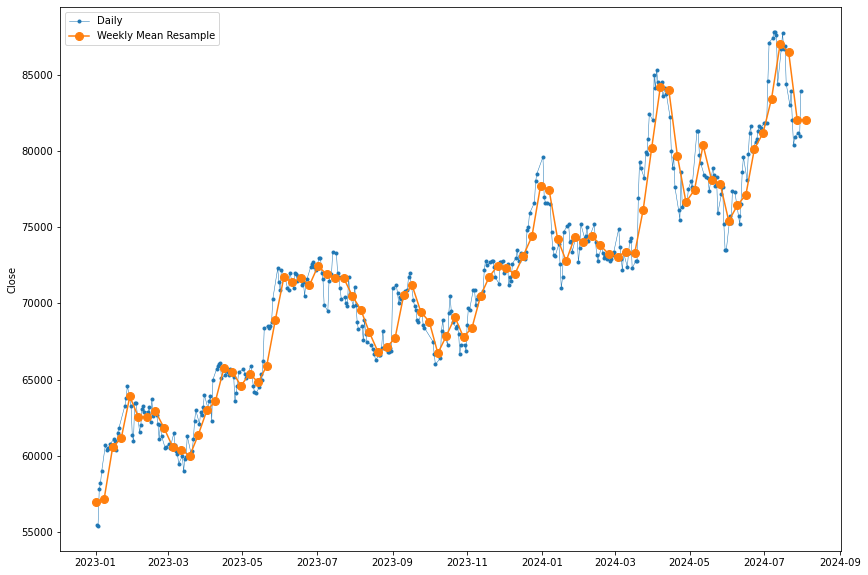

In [12]:
# Start and end of the date range to extract
start, end = '2023-01', '2024-08'

# Plot daily and weekly resampled time series together
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot()

ax.plot(df.loc[start:end, 'Close'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')

ax.plot(df_weekly_mean.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.set_ylabel('Close')
ax.legend();